In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# test_image 라는 폴더로 Path 설정
PATH = '/content/drive/MyDrive/Colab Notebooks/test_image/'

Mounted at /content/drive


In [ ]:
# 전역 변수 설정
TOTAL_IMAGES = 19
WIDTH, HEIGHT = 512, 512
K = [4, 16, 64]
N = [4, 8, 16, 32, 64, 128]

In [ ]:
# 이미지 파일 이름 가져오기
image_data = bytes()

filename = 'lena.img'
filepath = f'{PATH}{filename}'

try:
    with open(filepath, 'rb') as file:
        data = file.read()
        image_data = data
    print('파일 읽기 성공')
except FileNotFoundError:
    print('파일 읽기 실패')

파일 읽기 성공


In [ ]:
# 이미지 K차원 변환
def reshape_image(data, n):

    dimension_size = int(n ** 0.5)
    result = []

    dimension_width = WIDTH // dimension_size
    dimension_height = HEIGHT // dimension_size

    for block_y in range(dimension_height):
        for block_x in range(dimension_width):
            block = []
            for y in range(dimension_size):
                for x in range(dimension_size):
                    pixel_x = block_x*dimension_size + x
                    pixel_y = block_y*dimension_size + y
                    index = pixel_y*WIDTH + pixel_x
                    block.append(data[index])
            result.append(block)

    return result

In [ ]:
# mse 계산 함수
def cal_mse(image_data, centroids):
    mse = 0
    for pixel in image_data:
        min_distance = float('inf')
        for centroid in centroids:
            distance = 0
            for i in range(len(pixel)):
                distance += (pixel[i] - centroid[i]) ** 2
            if distance < min_distance:
                min_distance = distance
        mse += min_distance
    mse /= len(image_data)
    return mse

In [ ]:
# 모든 결과에 대한 mse 계산
for k in K:
    dimensioned_img = reshape_image(image_data, k)

    for n in N:
        centroids = []
        filename = f'{k}_{n}_centroids.txt'
        filepath = f'{PATH}{filename}'

        with open(filepath, 'r') as file:
            for line in file:
                str_values = line.strip().split(',')
                float_values = [float(value) for value in str_values]
                centroids.append(float_values)

        mse = cal_mse(dimensioned_img, centroids)
        mse_rounded = round(mse, 4)
        print(f"k = {k}, n = {n}, MSE = {mse_rounded}")

k = 4, n = 4, MSE = 976.0034
k = 4, n = 8, MSE = 408.3491
k = 4, n = 16, MSE = 264.7076
k = 4, n = 32, MSE = 170.245
k = 4, n = 64, MSE = 118.7588
k = 4, n = 128, MSE = 87.71
k = 16, n = 4, MSE = 5288.8331
k = 16, n = 8, MSE = 3259.7636
k = 16, n = 16, MSE = 2263.4708
k = 16, n = 32, MSE = 1667.9091
k = 16, n = 64, MSE = 1309.6313
k = 16, n = 128, MSE = 1055.6972
k = 64, n = 4, MSE = 30421.684
k = 64, n = 8, MSE = 23378.3769
k = 64, n = 16, MSE = 17092.423
k = 64, n = 32, MSE = 13163.292
k = 64, n = 64, MSE = 11135.1412
k = 64, n = 128, MSE = 9497.6927


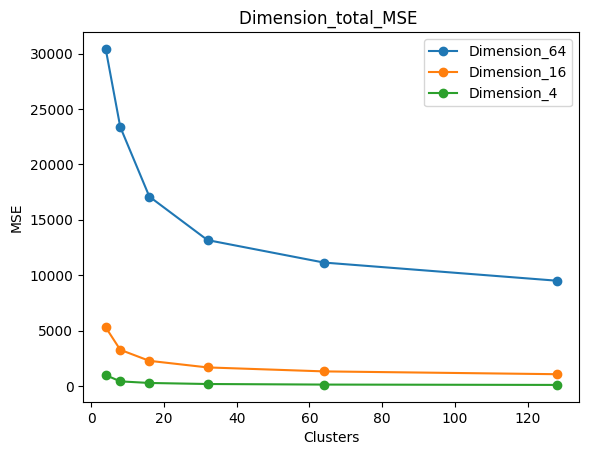

In [ ]:
import matplotlib.pyplot as plt

# MSE 값들

mse_values = [[30421.684, 23378.3769, 17092.423, 13163.292, 11135.1412, 9497.6927],[5288.8331, 3259.7636, 2263.4708, 1667.9091, 1309.6313, 1055.6972],[976.0034,408.3491,264.7076,170.245,118.7588,87.71]]
# 5288.8331, 3259.7636, 2263.4708, 1667.9091, 1309.6313, 1055.6972
# 30421.684, 23378.3769, 17092.423, 13163.292, 11135.1412, 9497.6927
# 선 그래프 그리기

# plt.plot(N, mse_values, marker='o')  # mse 리스트의 마지막 값 제외 (N과 요소 수가 일치해야 함)
# for i, txt in enumerate(N):
#     plt.text(N[i], mse_values[i], txt, ha='center', va='top')

# for i, values in enumerate(mse_values):
#     plt.plot(N, values, marker='o', label=f'Series {i+1}')
plt.plot(N, mse_values[0], marker='o', label='Dimension_64') # Series 1 라벨 추가
plt.plot(N, mse_values[1], marker='o', label='Dimension_16') # Series 2 라벨 추가
plt.plot(N, mse_values[2], marker='o', label='Dimension_4') # Series 3 라벨 추가
# for i, value in enumerate(N):
#     plt.text(value, mse_values[i] - (max(mse_values) - min(mse_values)) * 0.01, str(value), ha='center', va='top')
plt.legend()
# 그래프 제목 및 축 레이블 추가
plt.title("Dimension_total_MSE ")
plt.xlabel("Clusters")
plt.ylabel("MSE")

# 그래프에 그리드 추가 (선택적)
#plt.grid(True)

# 그래프 보여주기
plt.show()

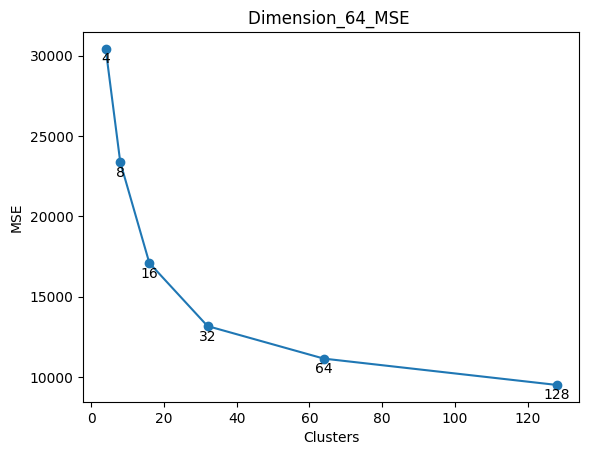

In [ ]:
import matplotlib.pyplot as plt

# MSE 값들
# mse_values = [5288.8331, 3259.7636, 2263.4708, 1667.9091, 1309.6313, 1055.6972]
mse_values = [30421.684, 23378.3769, 17092.423, 13163.292, 11135.1412, 9497.6927]

# MSE 값에 대응하는 X축 값들 (예를 들어, 여기서는 단순히 1부터 시작하는 인덱스를 사용합니다)
x_values = range(1, len(mse_values) + 1)

# 선 그래프 그리기
plt.plot(N, mse_values, marker='o')  # mse 리스트의 마지막 값 제외 (N과 요소 수가 일치해야 함)
# for i, txt in enumerate(N):
#     plt.text(N[i], mse_values[i], txt, ha='center', va='top')

for i, value in enumerate(N):
    plt.text(value, mse_values[i] - (max(mse_values) - min(mse_values)) * 0.01, str(value), ha='center', va='top')

# 그래프 제목 및 축 레이블 추가
plt.title("Dimension_64_MSE ")
plt.xlabel("Clusters")
plt.ylabel("MSE")

# 그래프에 그리드 추가 (선택적)
#plt.grid(True)

# 그래프 보여주기
plt.show()